In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark, lumi

from tabulate import tabulate

Welcome to JupyROOT 6.26/04


# phi gamma

In [113]:
base_file_loc = '/media/jykim/T7/storage/01_recon/trainv2new_sig_extract/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2new_sig_extract_400fb/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2new_0009_Q_sig_extract_sig_bkg/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext_sig_bkg/'
#base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv5_sig_ext_onlybkg/'

# base_file_loc =  '/media/jykim/T7/storage/01_recon/v2_sigext_omega_const_sigbkg_1ab/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/train_v6_beambkg_sig_ext/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/v6_pre_ext_omega_const_wide_Q/'

# phigamma_ccbar = base_file_loc + 'topo/topo_phi_D0_M/topoana.root'
phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'



# phigamma_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
phigamma_uubar = base_file_loc + 'uubar/recon_udst_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
phigamma_charged = base_file_loc + 'charged/recon_udst_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_udst_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_udst_*.root'

In [120]:
base_filter=' Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '

base_filter='gamma_E>0.7 && abs(Dstarp_Q-0.00593)<0.001 && D0_M>1.67 && D0_M<2.06 && phi_rank_Dstp==1 && Pi0_Prob<0.9 && Dstarp_CMS_p>2.49'

# base_filter='Pi0_Prob<0.95 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06'

#ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0 !=1 && iCascDcyBrP_Dst_0 !=2)'
# ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '


#ccbar_filter='Pi0_Prob<0.9 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_D0_0 !=0 ) && (phi_rank_Dstp ==1)'

variables=['D0_M','D0_cosHel_0','gamma_E','Pi0_Prob','phi_Km_nCDCHits','D0_D0_M_before']
topo_variables = variables + ['iCascDcyBrP_Dst_0']
tree='phi'

In [121]:
phipi0_filter='gamma_E>0.7 && abs(Dstarp_Q-0.00593)<0.001 &&   phi_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0==0 || iCascDcyBrP_Dst_0==95 || iCascDcyBrP_Dst_0==63)&& iCascDcyBrP_Dst_0!=4 && Pi0_Prob<0.9 && Dstarp_CMS_p>2.49'
except_phipi0_filter='gamma_E>0.7 && abs(Dstarp_Q-0.00593)<0.001 &&  phi_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0!=0 && iCascDcyBrP_Dst_0!=95 && iCascDcyBrP_Dst_0!=63) && iCascDcyBrP_Dst_0!=4 && Pi0_Prob<0.9 && Dstarp_CMS_p>2.49'
signal_filter='gamma_E>0.7 && abs(Dstarp_Q-0.00593)<0.001 &&   phi_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && iCascDcyBrP_Dst_0==4 && Pi0_Prob<0.9 && Dstarp_CMS_p>2.49'

In [122]:
pd_phigamma_ccbar_phipi0 = get_pd(file=phigamma_ccbar, tree=tree,base_filter=phipi0_filter,variables=topo_variables)
pd_phigamma_ccbar_remain = get_pd(file=phigamma_ccbar, tree=tree,base_filter=except_phipi0_filter,variables=topo_variables)
pd_phigamma_ccbar_signal = get_pd(file=phigamma_ccbar, tree=tree,base_filter=signal_filter,variables=topo_variables)

pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

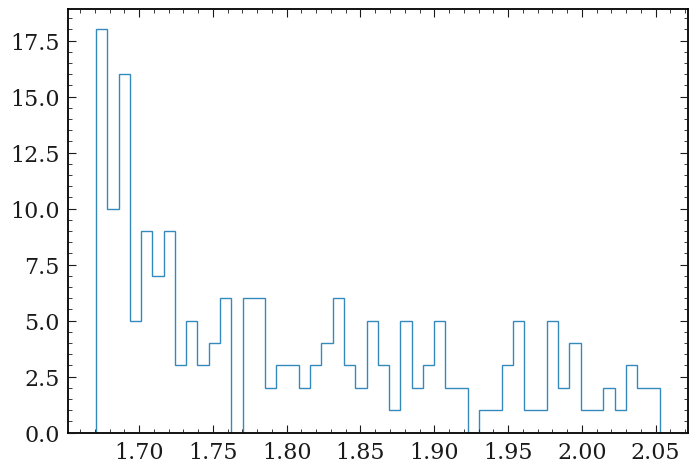

In [123]:
K0_kpkm_filter='  phi_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0==3 || iCascDcyBrP_Dst_0==17 || iCascDcyBrP_Dst_0==19) && Pi0_Prob<0.9 && Dstarp_CMS_p>2.49'
# K0_kpkm_filter='  Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0!=3 && iCascDcyBrP_Dst_0!=17 && iCascDcyBrP_Dst_0!=19) && Pi0_Prob<0.9 && Dstarp_CMS_p>2.49'


pd_K0_kpkm = get_pd(file=phigamma_ccbar, tree=tree,base_filter=K0_kpkm_filter,variables=variables)
plt.hist(pd_K0_kpkm.D0_M, bins=50, histtype='step');


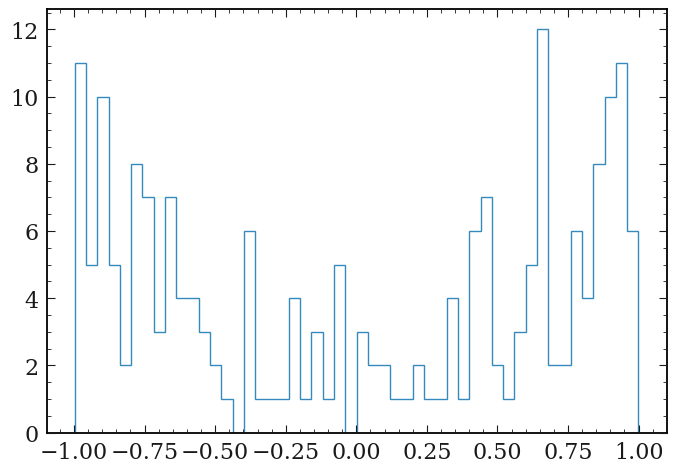

In [26]:
plt.hist(pd_K0_kpkm.D0_cosHel_0, bins=50, histtype='step');


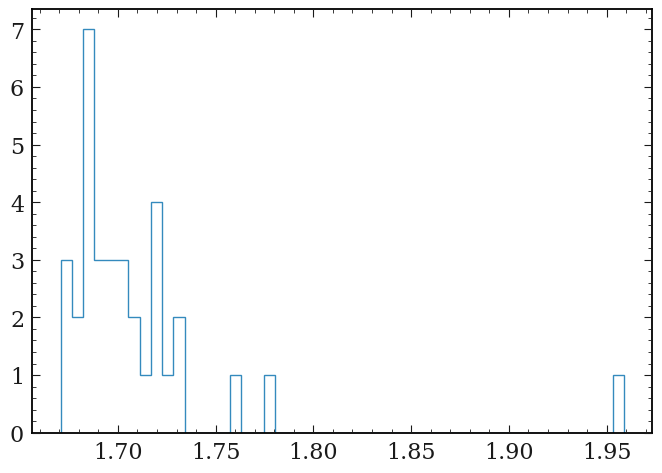

In [27]:
K0_kpkm_filter='  Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0==35) && Pi0_Prob<0.9 && Dstarp_CMS_p>2.49'
# K0_kpkm_filter='  Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0!=3 && iCascDcyBrP_Dst_0!=17 && iCascDcyBrP_Dst_0!=19) && Pi0_Prob<0.9 && Dstarp_CMS_p>2.49'


pd_K0_kpkm = get_pd(file=phigamma_ccbar, tree=tree,base_filter=K0_kpkm_filter,variables=variables)
plt.hist(pd_K0_kpkm.D0_M, bins=50, histtype='step');


In [28]:
pd_phigamma_ccbar_remain['iCascDcyBrP_Dst_0'].value_counts().nlargest(20)

-1      50
 19     35
 3      34
 35     30
 7      25
 11     24
 26     19
 66     15
 17     15
 33      7
 54      7
 21      5
 450     5
 197     5
 261     4
 18      4
 5       3
 131     3
 187     2
 53      2
Name: iCascDcyBrP_Dst_0, dtype: int64

In [10]:
pd_phigamma_ccbar_remain['iCascDcyBrP_Dst_0'].value_counts().nlargest(10).index[0]

-1

0
1
2
3
4
5
6
7
8
9


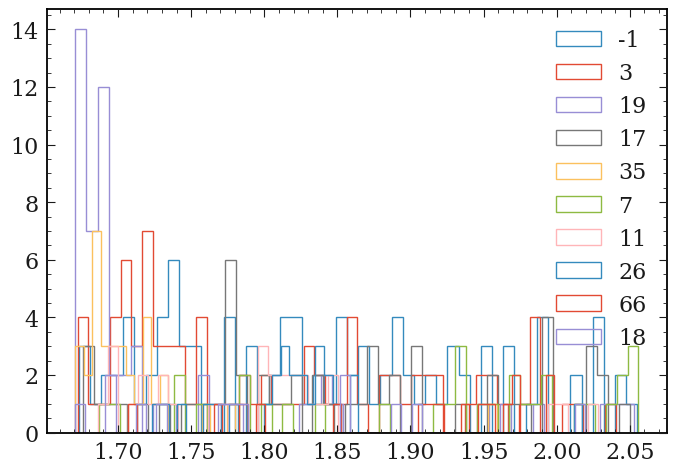

In [11]:
bkg_listing = pd_phigamma_ccbar_remain['iCascDcyBrP_Dst_0'].value_counts().nlargest(10)

for i in range(10):
    #decay_chain = bkg_listing.index[i]
    
    #cut = 'iCascDcyBrP_Dst_0 = ' + decay_chain
    df = pd_phigamma_ccbar_remain[pd_phigamma_ccbar_remain['iCascDcyBrP_Dst_0']==pd_phigamma_ccbar_remain['iCascDcyBrP_Dst_0'].value_counts().nlargest(10).index[i]]
    plt.hist(df.D0_M, bins=50, histtype='step',label=pd_phigamma_ccbar_remain['iCascDcyBrP_Dst_0'].value_counts().nlargest(10).index[i]);
    plt.legend()
    print(i)

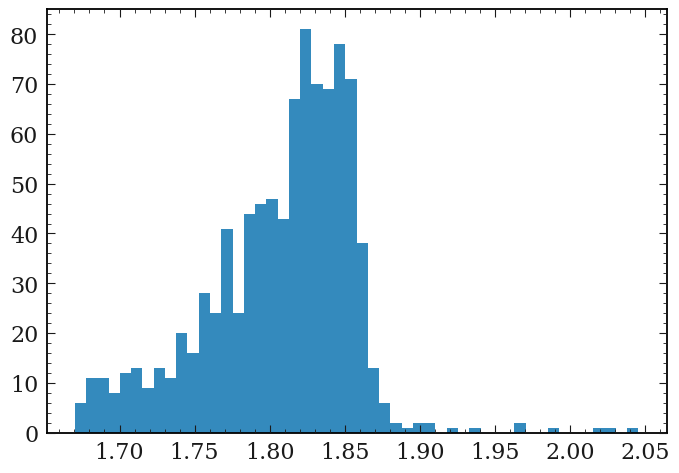

In [80]:
plt.hist(pd_phigamma_ccbar_phipi0.D0_M, bins=50);

In [81]:
N_real_sig = len(pd_phigamma_ccbar_signal)
print(N_real_sig)

149


In [39]:
f = '/media/jykim/T7/storage/01_recon/phi/trainv2_sig_extraction_signalMC_recon_mdst_phi.root'
pd_signalMC = get_pd(file=f, tree=tree,base_filter=base_filter,variables=variables)

N_signalMC_sig = len(pd_signalMC)

In [13]:
scale_factor = N_real_sig/N_signalMC_sig

D0_M


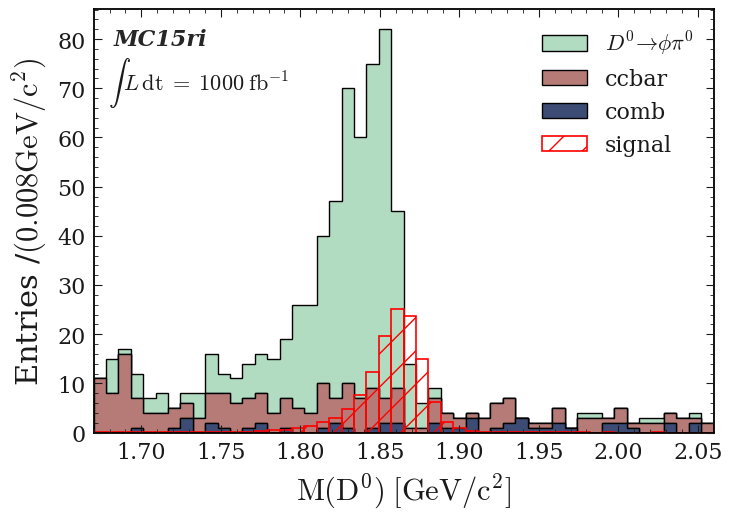

<Figure size 800x550 with 0 Axes>

In [14]:
labels = ['comb','ccbar' ,r'$D^0 \to \phi\pi^0$']

fig = plt.figure()
ax = fig.subplots()
colors=b2helix(3)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_phigamma_mixed[var] }
    charged_bkg = {var : pd_phigamma_charged[var] }
    uubar_bkg = {var : pd_phigamma_uubar[var] }
    ddbar_bkg = {var : pd_phigamma_ddbar[var] }
    ssbar_bkg = {var : pd_phigamma_ssbar[var] }
    taupair_bkg = {var : pd_phigamma_taupair[var] }
    
    
    ccbar_bkg = {var : pd_phigamma_ccbar_remain[var] }    
    Vpi0_bkg = {var : pd_phigamma_ccbar_phipi0[var] }
    
    #comb_bkg = pd.DataFrame
    
    comb_bkg_data = pd.concat([mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var]], ignore_index=True)
    comb_bkg = {var : comb_bkg_data}
    #print(mixed_bkg)
    #data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [comb_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

    
#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal', linewidth=2.5)

    dataset = pd_signalMC
    n, xe = np.histogram(dataset["D0_M"], bins=50, range=(1.67,2.06))
    dx = np.diff(xe)

    ax.bar(xe[:-1], n*scale_factor, width=dx, align="edge",label='signal',linewidth=1.2,edgecolor='red',hatch='/',fill=False)

    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)




    watermark(t="",logo="MC15ri")
    lumi(l=r"$1000\; \mathrm{fb}^{-1}$",px=0.023, py=0.81)
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    
    
    
    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

D0_M


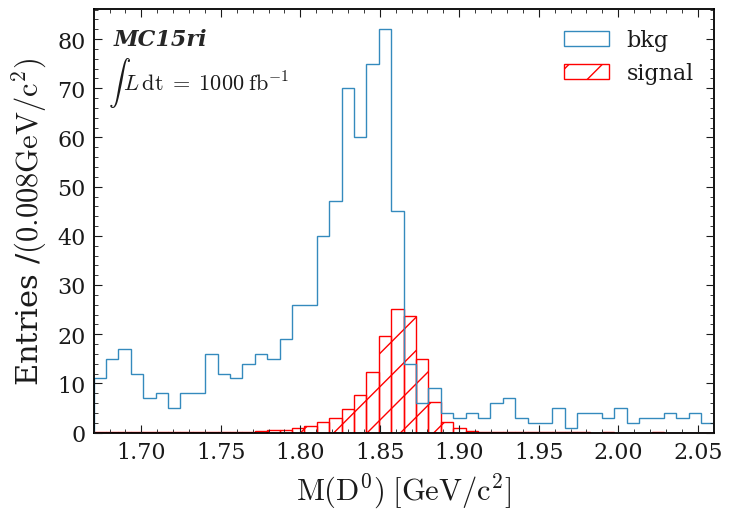

<Figure size 800x550 with 0 Axes>

In [50]:
labels = ['bkg']

fig = plt.figure()
ax = fig.subplots()
colors=b2helix(1)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_phigamma_mixed[var] }
    charged_bkg = {var : pd_phigamma_charged[var] }
    uubar_bkg = {var : pd_phigamma_uubar[var] }
    ddbar_bkg = {var : pd_phigamma_ddbar[var] }
    ssbar_bkg = {var : pd_phigamma_ssbar[var] }
    taupair_bkg = {var : pd_phigamma_taupair[var] }
    
    
    ccbar_bkg = {var : pd_phigamma_ccbar_remain[var] }    
    Vpi0_bkg = {var : pd_phigamma_ccbar_phipi0[var] }
    
    #comb_bkg = pd.DataFrame
    
    comb_bkg_data = pd.concat([mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var] , ccbar_bkg[var], Vpi0_bkg[var]], ignore_index=True)
    comb_bkg = {var : comb_bkg_data}
    #print(mixed_bkg)
    #data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [comb_bkg[var]]  

    
#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='step', stacked=True,label=labels)
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal', linewidth=2.5)

    dataset = pd_signalMC
    n, xe = np.histogram(dataset["D0_M"], bins=50, range=(1.67,2.06))
    dx = np.diff(xe)

    ax.bar(xe[:-1], n*scale_factor, width=dx, align="edge",label='signal',linewidth=1,edgecolor='red',hatch='/',fill=False)

    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)




    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    
    
    
    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)
    lumi(l=r"$1000\; \mathrm{fb}^{-1}$",px=0.023, py=0.81)
    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

phi_Km_nCDCHits


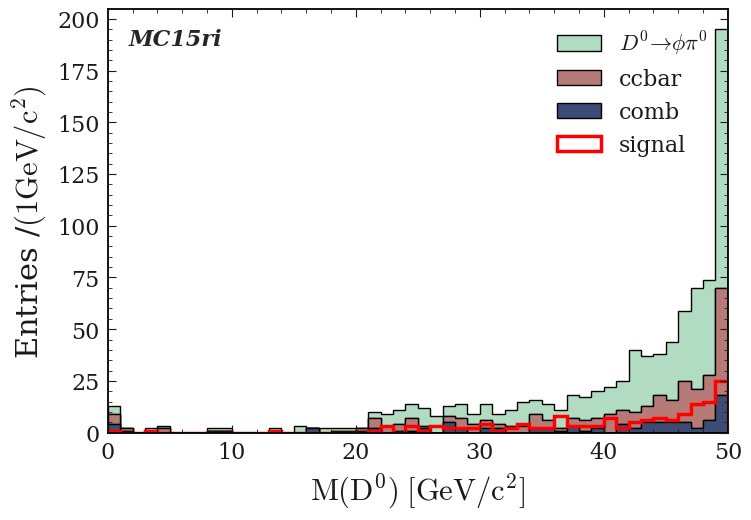

<Figure size 800x550 with 0 Axes>

In [59]:
labels = ['comb','ccbar' ,r'$D^0 \to \phi\pi^0$']


colors=b2helix(3)

data_list=dict()
signal_variables = ["phi_Km_nCDCHits"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_phigamma_mixed[var] }
    charged_bkg = {var : pd_phigamma_charged[var] }
    uubar_bkg = {var : pd_phigamma_uubar[var] }
    ddbar_bkg = {var : pd_phigamma_ddbar[var] }
    ssbar_bkg = {var : pd_phigamma_ssbar[var] }
    taupair_bkg = {var : pd_phigamma_taupair[var] }
    
    
    ccbar_bkg = {var : pd_phigamma_ccbar_remain[var] }    
    Vpi0_bkg = {var : pd_phigamma_ccbar_phipi0[var] }
    
    #comb_bkg = pd.DataFrame
    
    comb_bkg_data = pd.concat([mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var]], ignore_index=True)
    comb_bkg = {var : comb_bkg_data}
    #print(mixed_bkg)
    #data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [comb_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

    
#     for labeling in labels:
    xrange=(0,50)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
    plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal', linewidth=2.5)
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

Pi0_Prob


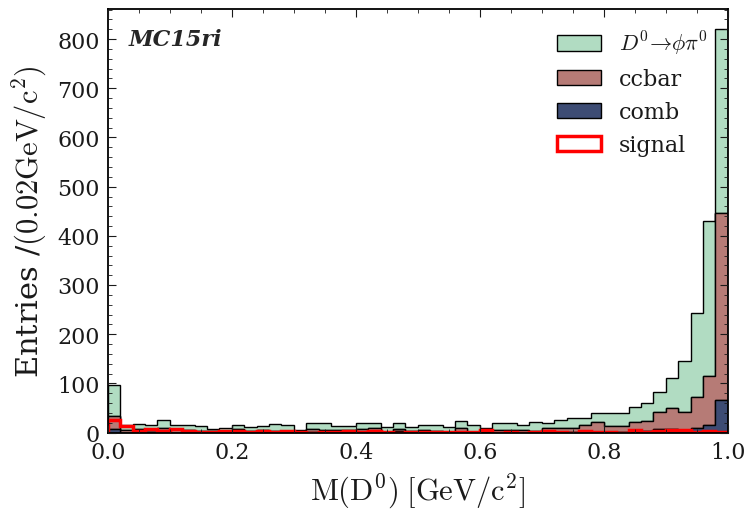

<Figure size 800x550 with 0 Axes>

In [9]:
labels = ['comb','ccbar' ,r'$D^0 \to \phi\pi^0$']


colors=b2helix(3)

data_list=dict()
signal_variables = ["Pi0_Prob"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_phigamma_mixed[var] }
    charged_bkg = {var : pd_phigamma_charged[var] }
    uubar_bkg = {var : pd_phigamma_uubar[var] }
    ddbar_bkg = {var : pd_phigamma_ddbar[var] }
    ssbar_bkg = {var : pd_phigamma_ssbar[var] }
    taupair_bkg = {var : pd_phigamma_taupair[var] }
    
    
    ccbar_bkg = {var : pd_phigamma_ccbar_remain[var] }    
    Vpi0_bkg = {var : pd_phigamma_ccbar_phipi0[var] }
    
    #comb_bkg = pd.DataFrame
    
    comb_bkg_data = pd.concat([mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var]], ignore_index=True)
    comb_bkg = {var : comb_bkg_data}
    #print(mixed_bkg)
    #data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [comb_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

    
#     for labeling in labels:
    xrange=(0,1)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
    plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal', linewidth=2.5)
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

D0_M


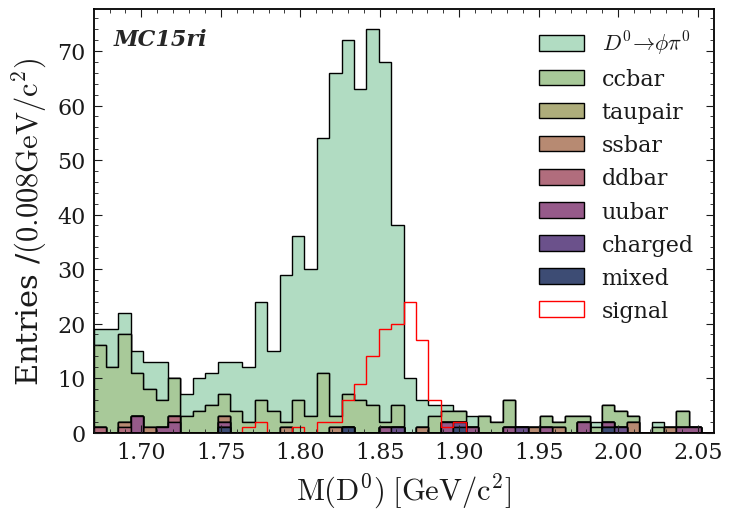

D0_D0_M_before


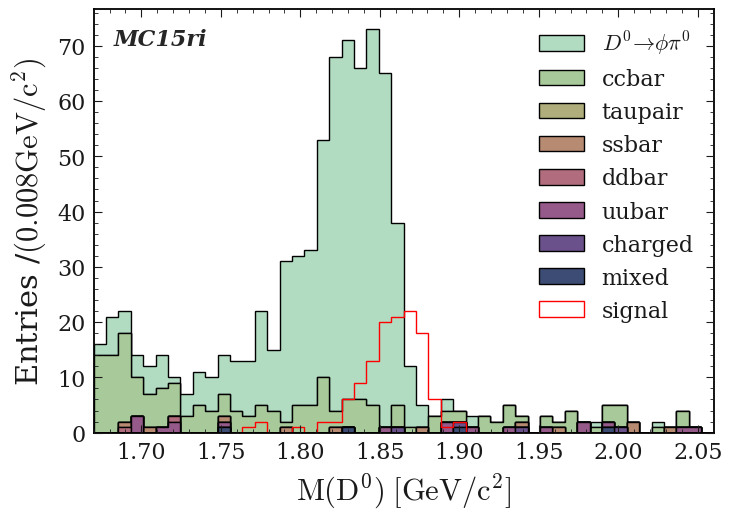

<Figure size 800x550 with 0 Axes>

In [124]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ,r'$D^0 \to \phi\pi^0$']


colors=b2helix(8)

data_list=dict()
signal_variables = ["D0_M","D0_D0_M_before"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_phigamma_mixed[var] }
    charged_bkg = {var : pd_phigamma_charged[var] }
    ccbar_bkg = {var : pd_phigamma_ccbar_remain[var] }
    uubar_bkg = {var : pd_phigamma_uubar[var] }
    ddbar_bkg = {var : pd_phigamma_ddbar[var] }
    ssbar_bkg = {var : pd_phigamma_ssbar[var] }
    taupair_bkg = {var : pd_phigamma_taupair[var] }
    Vpi0_bkg = {var : pd_phigamma_ccbar_phipi0[var] }
    
    #print(mixed_bkg)
    #data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
    plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

gamma_E


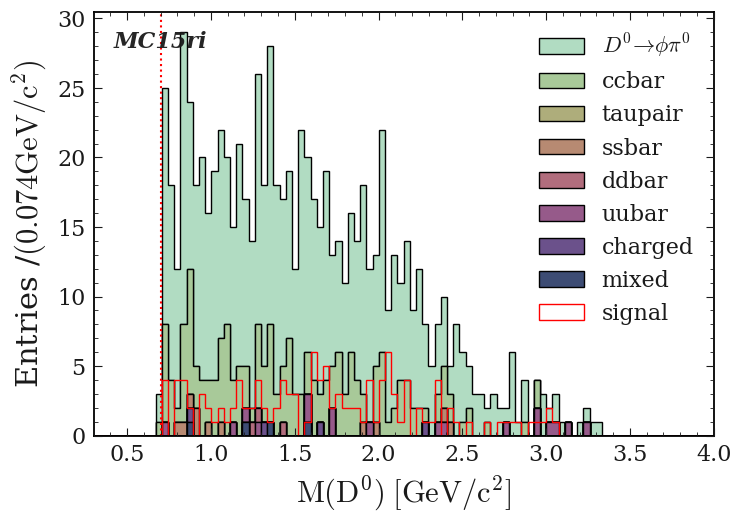

<Figure size 800x550 with 0 Axes>

In [125]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ,r'$D^0 \to \phi\pi^0$']


colors=b2helix(8)

data_list=dict()
signal_variables = ["gamma_E"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_phigamma_mixed[var] }
    charged_bkg = {var : pd_phigamma_charged[var] }
    ccbar_bkg = {var : pd_phigamma_ccbar_remain[var] }
    uubar_bkg = {var : pd_phigamma_uubar[var] }
    ddbar_bkg = {var : pd_phigamma_ddbar[var] }
    ssbar_bkg = {var : pd_phigamma_ssbar[var] }
    taupair_bkg = {var : pd_phigamma_taupair[var] }
    Vpi0_bkg = {var : pd_phigamma_ccbar_phipi0[var] }
    
    #print(mixed_bkg)
    #data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

#     for labeling in labels:
    xrange=(0.3,4)
    xbins = np.linspace(*xrange,101)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
    plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)
    plt.axvline(x=0.7,  color='red', linestyle='dotted')

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

D0_M


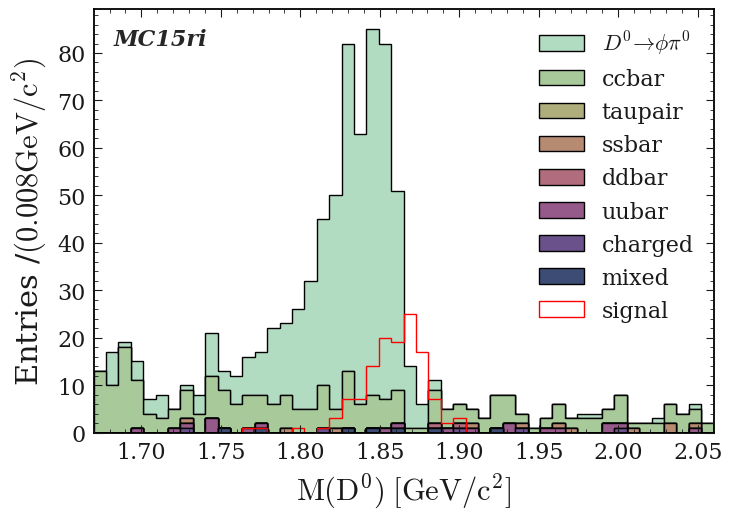

<Figure size 800x550 with 0 Axes>

In [50]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ,r'$D^0 \to \phi\pi^0$']


colors=b2helix(8)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_phigamma_mixed[var] }
    charged_bkg = {var : pd_phigamma_charged[var] }
    ccbar_bkg = {var : pd_phigamma_ccbar_remain[var] }
    uubar_bkg = {var : pd_phigamma_uubar[var] }
    ddbar_bkg = {var : pd_phigamma_ddbar[var] }
    ssbar_bkg = {var : pd_phigamma_ssbar[var] }
    taupair_bkg = {var : pd_phigamma_taupair[var] }
    Vpi0_bkg = {var : pd_phigamma_ccbar_phipi0[var] }
    
    #print(mixed_bkg)
    #data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
    plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

D0_M


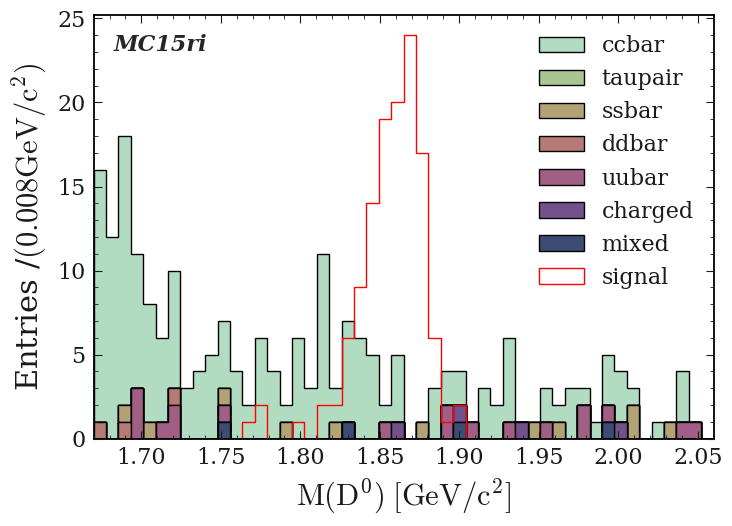

D0_D0_M_before


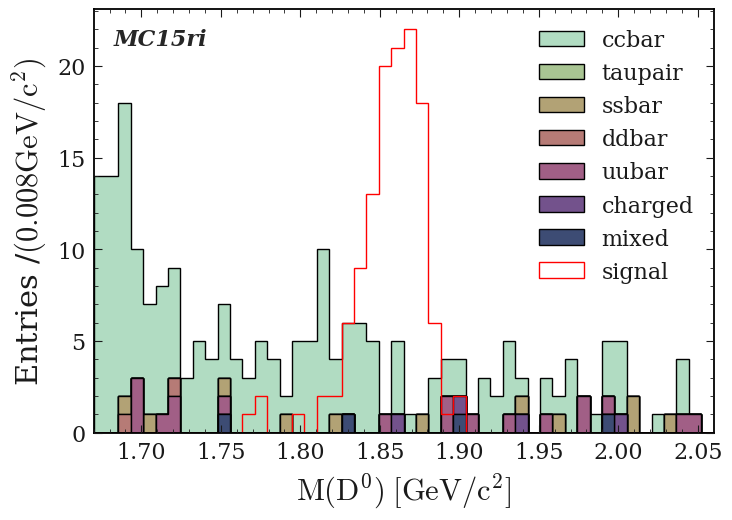

<Figure size 800x550 with 0 Axes>

In [126]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ]


colors=b2helix(7)

data_list=dict()
signal_variables = ["D0_M","D0_D0_M_before"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_phigamma_mixed[var] }
    charged_bkg = {var : pd_phigamma_charged[var] }
    ccbar_bkg = {var : pd_phigamma_ccbar_remain[var] }
    uubar_bkg = {var : pd_phigamma_uubar[var] }
    ddbar_bkg = {var : pd_phigamma_ddbar[var] }
    ssbar_bkg = {var : pd_phigamma_ssbar[var] }
    taupair_bkg = {var : pd_phigamma_taupair[var] }
    #Vpi0_bkg = {var : pd_phigamma_ccbar_phipi0[var] }
    
    #print(mixed_bkg)
    #data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
    plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

gamma_E


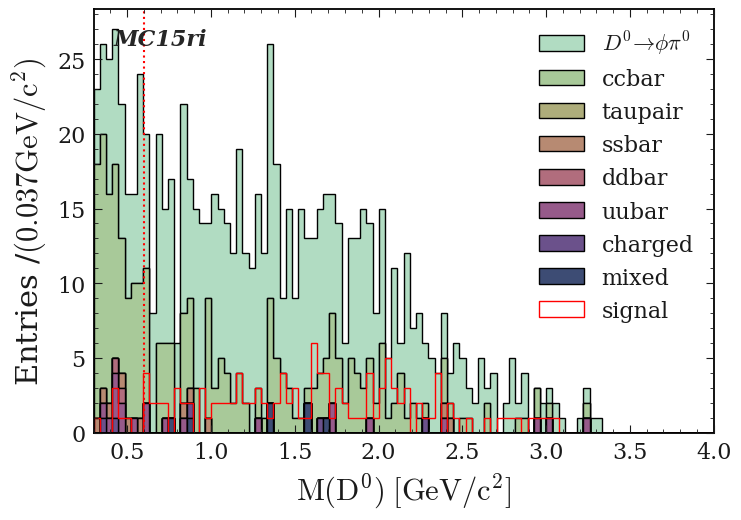

<Figure size 800x550 with 0 Axes>

In [52]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ,r'$D^0 \to \phi\pi^0$']


colors=b2helix(8)

data_list=dict()
signal_variables = ["gamma_E"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_phigamma_mixed[var] }
    charged_bkg = {var : pd_phigamma_charged[var] }
    ccbar_bkg = {var : pd_phigamma_ccbar_remain[var] }
    uubar_bkg = {var : pd_phigamma_uubar[var] }
    ddbar_bkg = {var : pd_phigamma_ddbar[var] }
    ssbar_bkg = {var : pd_phigamma_ssbar[var] }
    taupair_bkg = {var : pd_phigamma_taupair[var] }
    Vpi0_bkg = {var : pd_phigamma_ccbar_phipi0[var] }
    
    #print(mixed_bkg)
    # data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

#     for labeling in labels:
    xrange=(0.3,4)
    xbins = np.linspace(*xrange,101)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
    plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    plt.axvline(x=0.6,  color='red', linestyle='dotted')

    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=100, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

In [31]:
len(pd_phigamma_ccbar_signal[var])

134

##### 

# antiKstar gamma

In [12]:
# base_file_loc = '/media/jykim/T7/storage/01_recon/skim_1ab_inv_signal_extraction/'
base_file_loc = '/media/jykim/T7/storage/01_recon/new_sigext_cuts_skim_1ab_inv_bkg_sig/'
base_file_loc = '/media/jykim/T7/storage/01_recon/trainv2new_sig_extract/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2new_sig_extract_400fb/'
# base_file_loc = '/media/jykim/T7/storage/01_recon/trainv2new_pi0veto/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext_sig_bkg/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/v2_sigext_omega_const_sigbkg_1ab/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/train_v6_beambkg_sig_ext/'

# Vg_ccbar = base_file_loc + 'topo/topo_antiKstar_D0_M/topoana.root'
Vg_ccbar = base_file_loc + 'topo/resultfile/result_antiKstar/standard.root'

# Vg_ccbar = base_file_loc + 'topo/skim_1abinv_antiKstar_D0_M/topoana.root'
# phigamma_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
Vg_uubar = base_file_loc + 'uubar/recon_udst_*.root'
Vg_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
Vg_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
Vg_charged = base_file_loc + 'charged/recon_udst_*.root'
Vg_mixed = base_file_loc + 'mixed/recon_udst_*.root'
Vg_taupair = base_file_loc + 'taupair/recon_udst_*.root'

In [13]:
base_filter='abs(D0_cosHel_0)<0.8 && Pi0_Prob<0.85  && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
# base_filter=' Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '

#base_filter='Pi0_Prob<0.90  && D0_M>1.67 && D0_M<2.06 '

# base_filter='Pi0_Prob<0.95 && phi_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06'

#ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0 !=1 && iCascDcyBrP_Dst_0 !=2)'
# ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '


#ccbar_filter='Pi0_Prob<0.9 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_D0_0 !=0 ) && (phi_rank_Dstp ==1)'

variables=['D0_M','D0_cosHel_0','gamma_E']
tree='antiKstar'

In [14]:
Vpi0_filter='abs(D0_cosHel_0)<0.8 && Pi0_Prob<0.85  &&  Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0==0  || iCascDcyBrP_Dst_0==44 || iCascDcyBrP_Dst_0==26) && iCascDcyBrP_Dst_0!=12 && iCascDcyBrP_Dst_0!=40'
except_Vpi0_filter='abs(D0_cosHel_0)<0.8 &&  Pi0_Prob<0.85  && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 &&  (iCascDcyBrP_Dst_0!=0  && iCascDcyBrP_Dst_0!=44 && iCascDcyBrP_Dst_0!=26 ) && iCascDcyBrP_Dst_0!=12 && iCascDcyBrP_Dst_0!=40'
signal_filter='abs(D0_cosHel_0)<0.8 && Pi0_Prob<0.85  && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0==12 || iCascDcyBrP_Dst_0==40) '

# Vpi0_filter=' Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0==0  || iCascDcyBrP_Dst_0==10 ) && iCascDcyBrP_Dst_0!=22'
# except_Vpi0_filter='Pis_charge==1 && D0_M>1.67 && D0_M<2.06 &&  (iCascDcyBrP_Dst_0!=0  && iCascDcyBrP_Dst_0!=10 ) && iCascDcyBrP_Dst_0!=22'
# signal_filter=' Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && iCascDcyBrP_Dst_0==22'

In [15]:
pd_Kg_ccbar_Vpi0 = get_pd(file=Vg_ccbar, tree=tree,base_filter=Vpi0_filter,variables=variables)
pd_Kg_ccbar_remain = get_pd(file=Vg_ccbar, tree=tree,base_filter=except_Vpi0_filter,variables=variables)
pd_Kg_ccbar_signal = get_pd(file=Vg_ccbar, tree=tree,base_filter=signal_filter,variables=variables)

pd_Kg_uubar = get_pd(file=Vg_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_Kg_ddbar = get_pd(file=Vg_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_Kg_ssbar = get_pd(file=Vg_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_Kg_charged = get_pd(file=Vg_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_Kg_mixed = get_pd(file=Vg_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_Kg_taupair = get_pd(file=Vg_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [16]:
N_Vpi0 = len(pd_Kg_ccbar_Vpi0)
N_ccbar_remain = len(pd_Kg_ccbar_remain)
N_ccbar_signal = len(pd_Kg_ccbar_signal)
N_uubar = len(pd_Kg_uubar)
N_ddbar = len(pd_Kg_ddbar)
N_ssbar = len(pd_Kg_ssbar)
N_charged = len(pd_Kg_charged)
N_mixed = len(pd_Kg_mixed)
N_taupair = len(pd_Kg_taupair)

N_total = N_Vpi0 + N_ccbar_remain + N_ccbar_signal + N_uubar + N_ddbar + N_ssbar + N_charged + N_mixed + N_taupair

In [17]:
table = [['Categories', 'N', 'Fraction'], 
         ['signal', N_ccbar_signal, round(N_ccbar_signal/N_total, 4 )], 
         ['main pi0 bkg', N_Vpi0 , round(N_Vpi0/N_total, 4 )], 
         ['ccbar remained ', N_ccbar_remain, round(N_ccbar_remain/N_total, 4 )], 
         ['uubar', N_uubar, round(N_uubar/N_total, 4 )],
         ['ddbar', N_ddbar, round(N_ddbar/N_total, 4 )],
         ['ssbar', N_ssbar, round(N_ssbar/N_total, 4 )],
         ['charged', N_charged, round(N_charged/N_total, 4 )],
         ['mixed', N_mixed, round(N_mixed/N_total, 4 )],
         ['taupair', N_taupair, round(N_taupair/N_total, 4 )],
        ]

In [18]:
print(tabulate(table, headers='firstrow', tablefmt='grid'))


+----------------+-------+------------+
| Categories     |     N |   Fraction |
+================+=======+============+
| signal         |  2308 |     0.1524 |
+----------------+-------+------------+
| main pi0 bkg   | 10788 |     0.7121 |
+----------------+-------+------------+
| ccbar remained |  1738 |     0.1147 |
+----------------+-------+------------+
| uubar          |   133 |     0.0088 |
+----------------+-------+------------+
| ddbar          |    50 |     0.0033 |
+----------------+-------+------------+
| ssbar          |    64 |     0.0042 |
+----------------+-------+------------+
| charged        |    20 |     0.0013 |
+----------------+-------+------------+
| mixed          |    46 |     0.003  |
+----------------+-------+------------+
| taupair        |     2 |     0.0001 |
+----------------+-------+------------+


D0_M


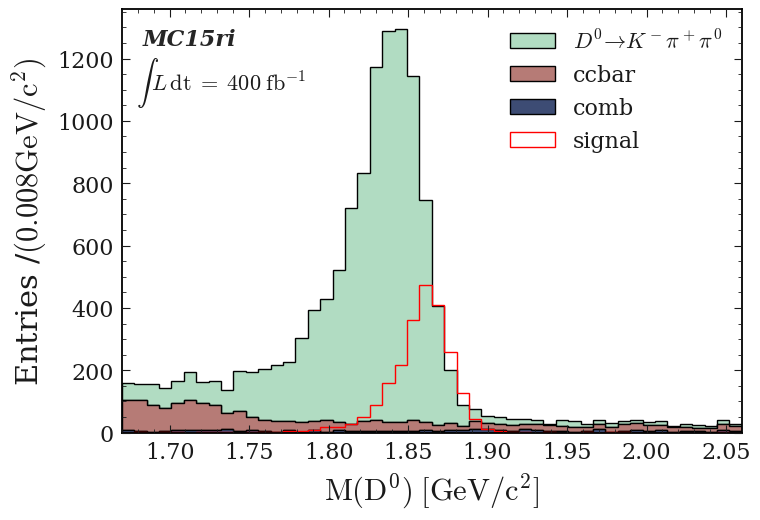

<Figure size 800x550 with 0 Axes>

In [19]:
labels = ['comb','ccbar' ,r'$D^0 \to K^- \pi^+ \pi^0$']


colors=b2helix(3)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_Kg_mixed[var] }
    charged_bkg = {var : pd_Kg_charged[var] }
    uubar_bkg = {var : pd_Kg_uubar[var] }
    ddbar_bkg = {var : pd_Kg_ddbar[var] }
    ssbar_bkg = {var : pd_Kg_ssbar[var] }
    taupair_bkg = {var : pd_Kg_taupair[var] }
    
    
    ccbar_bkg = {var : pd_Kg_ccbar_remain[var] }    
    Vpi0_bkg = {var : pd_Kg_ccbar_Vpi0[var] }
    
    #comb_bkg = pd.DataFrame
    
    comb_bkg_data = pd.concat([mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var]], ignore_index=True)
    comb_bkg = {var : comb_bkg_data}
    #print(mixed_bkg)
    #data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [comb_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

    
#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
    plt.hist(pd_Kg_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    lumi(l=r"$400\; \mathrm{fb}^{-1}$",px=0.023, py=0.81)
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

D0_M


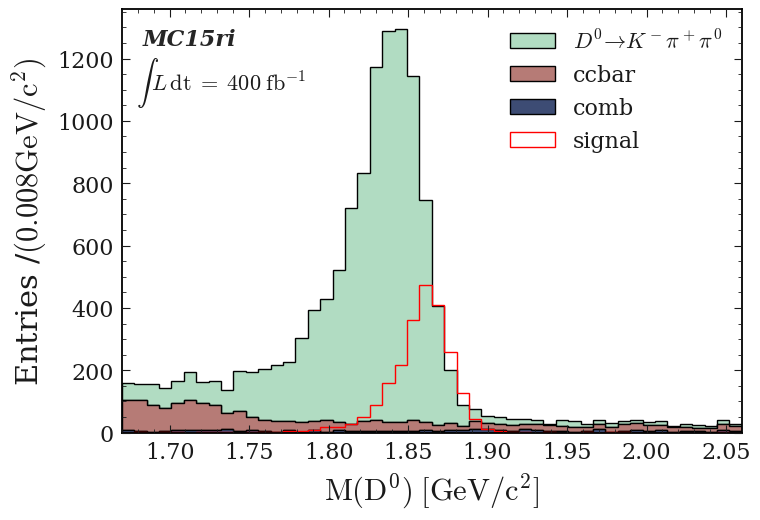

<Figure size 800x550 with 0 Axes>

In [20]:
labels = ['comb','ccbar' ,r'$D^0 \to K^- \pi^+ \pi^0$']


colors=b2helix(3)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_Kg_mixed[var] }
    charged_bkg = {var : pd_Kg_charged[var] }
    uubar_bkg = {var : pd_Kg_uubar[var] }
    ddbar_bkg = {var : pd_Kg_ddbar[var] }
    ssbar_bkg = {var : pd_Kg_ssbar[var] }
    taupair_bkg = {var : pd_Kg_taupair[var] }
    
    
    ccbar_bkg = {var : pd_Kg_ccbar_remain[var] }    
    Vpi0_bkg = {var : pd_Kg_ccbar_Vpi0[var] }
    
    #comb_bkg = pd.DataFrame
    
    comb_bkg_data = pd.concat([mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var]], ignore_index=True)
    comb_bkg = {var : comb_bkg_data}
    #print(mixed_bkg)
    #data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [comb_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

    
#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
    plt.hist(pd_Kg_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    lumi(l=r"$400\; \mathrm{fb}^{-1}$",px=0.023, py=0.81)
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

D0_M


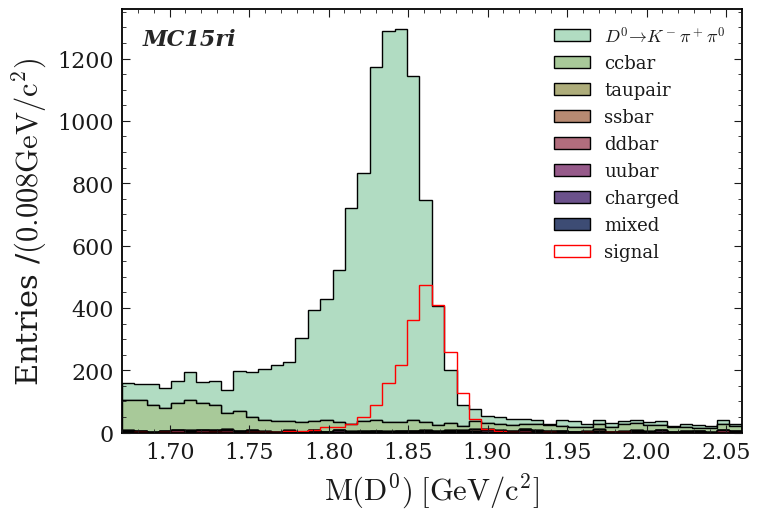

<Figure size 800x550 with 0 Axes>

In [21]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ,r'$D^0 \to K^- \pi^+ \pi^0$']


colors=b2helix(8)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_Kg_mixed[var] }
    charged_bkg = {var : pd_Kg_charged[var] }
    ccbar_bkg = {var : pd_Kg_ccbar_remain[var] }
    uubar_bkg = {var : pd_Kg_uubar[var] }
    ddbar_bkg = {var : pd_Kg_ddbar[var] }
    ssbar_bkg = {var : pd_Kg_ssbar[var] }
    taupair_bkg = {var : pd_Kg_taupair[var] }
    Vpi0_bkg = {var : pd_Kg_ccbar_Vpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    plt.hist(pd_Kg_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    cut = "Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

D0_M


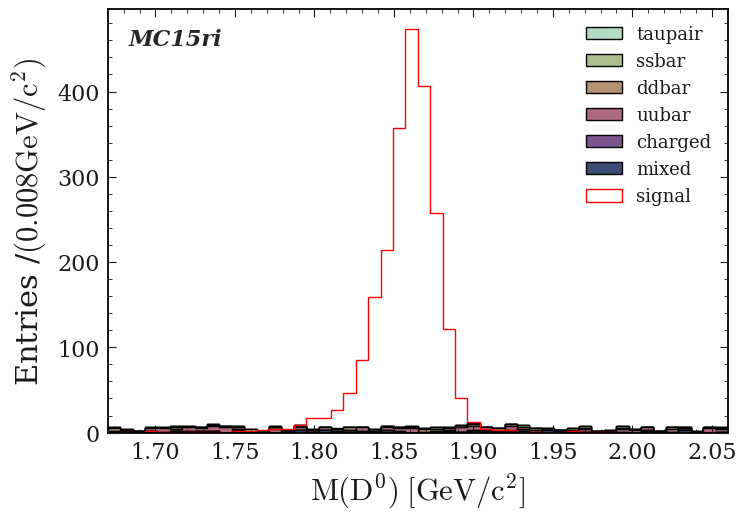

<Figure size 800x550 with 0 Axes>

In [27]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair']


colors=b2helix(6)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_Kg_mixed[var] }
    charged_bkg = {var : pd_Kg_charged[var] }
    ccbar_bkg = {var : pd_Kg_ccbar_remain[var] }
    uubar_bkg = {var : pd_Kg_uubar[var] }
    ddbar_bkg = {var : pd_Kg_ddbar[var] }
    ssbar_bkg = {var : pd_Kg_ssbar[var] }
    taupair_bkg = {var : pd_Kg_taupair[var] }
    Vpi0_bkg = {var : pd_Kg_ccbar_Vpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var]]  

#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    plt.hist(pd_Kg_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    cut = "Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

D0_cosHel_0


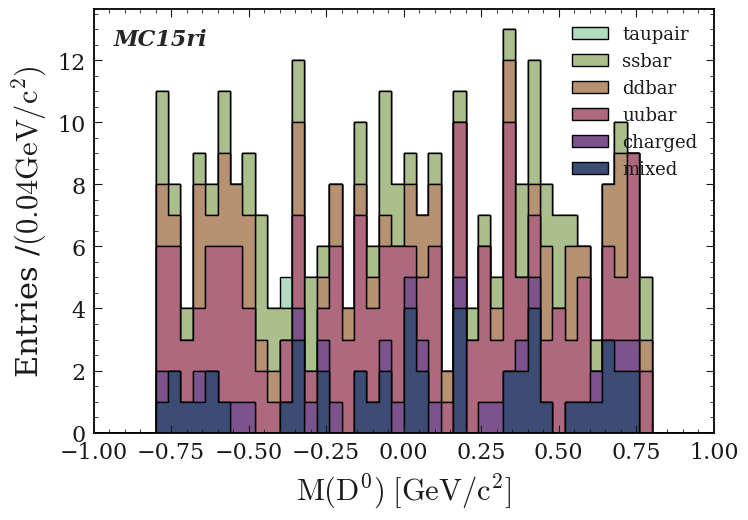

<Figure size 800x550 with 0 Axes>

In [28]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair']


colors=b2helix(6)

data_list=dict()
signal_variables = ["D0_cosHel_0"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_Kg_mixed[var] }
    charged_bkg = {var : pd_Kg_charged[var] }
    ccbar_bkg = {var : pd_Kg_ccbar_remain[var] }
    uubar_bkg = {var : pd_Kg_uubar[var] }
    ddbar_bkg = {var : pd_Kg_ddbar[var] }
    ssbar_bkg = {var : pd_Kg_ssbar[var] }
    taupair_bkg = {var : pd_Kg_taupair[var] }
    Vpi0_bkg = {var : pd_Kg_ccbar_Vpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var]]  

#     for labeling in labels:
    xrange=(-1,1)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
#     plt.hist(pd_Kg_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    cut = "Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(-1,1))

    ax.set_xlim(-1,1)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

gamma_E


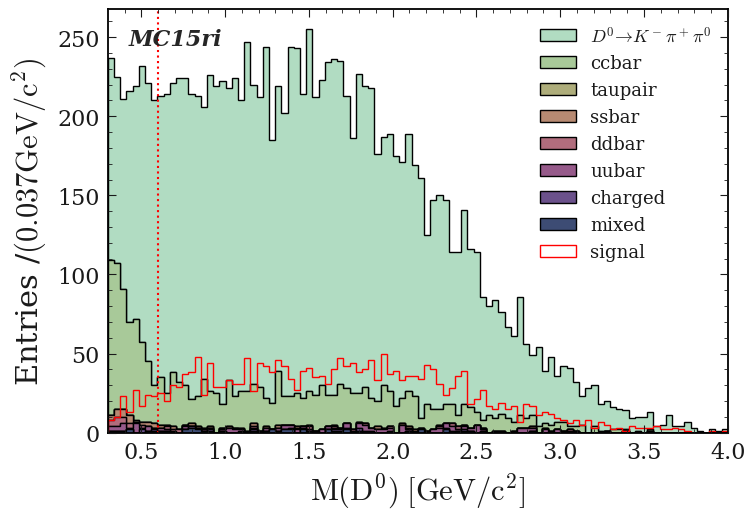

<Figure size 800x550 with 0 Axes>

In [29]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ,r'$D^0 \to K^- \pi^+ \pi^0$']


colors=b2helix(8)

data_list=dict()
signal_variables = ["gamma_E"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_Kg_mixed[var] }
    charged_bkg = {var : pd_Kg_charged[var] }
    ccbar_bkg = {var : pd_Kg_ccbar_remain[var] }
    uubar_bkg = {var : pd_Kg_uubar[var] }
    ddbar_bkg = {var : pd_Kg_ddbar[var] }
    ssbar_bkg = {var : pd_Kg_ssbar[var] }
    taupair_bkg = {var : pd_Kg_taupair[var] }
    Vpi0_bkg = {var : pd_Kg_ccbar_Vpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

#     for labeling in labels:
    xrange=(0.3, 4)
    xbins = np.linspace(*xrange,101)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    plt.hist(pd_Kg_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    plt.axvline(x=0.6,  color='red', linestyle='dotted')

    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    cut = "Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=100, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

In [30]:
len(Vpi0_bkg[var])

11312

In [31]:
len(Vpi0_bkg[var])

11312

# rho gamma

In [23]:
# base_file_loc = '/media/jykim/T7/storage/01_recon/skim_1ab_inv_signal_extraction/'

# Vg_ccbar = base_file_loc + 'topo/skim_1abinv_rho_D0_M/topoana.root'

base_file_loc = '/media/jykim/T7/storage/01_recon/new_sigext_cuts_skim_1ab_inv_bkg_sig/'
base_file_loc = '/media/jykim/T7/storage/01_recon/trainv2new_sig_extract/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2new_sig_extract_400fb/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext_sig_bkg/'

base_file_loc =  '/media/jykim/T7/storage/01_recon/v2_sigext_omega_const_sigbkg_1ab/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/train_v6_beambkg_sig_ext/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/v9mask_pre_extraction_400_bkgsig/'

Vg_ccbar = base_file_loc + 'topo/resultfile/result_rho/standard.root'

# Vg_ccbar = base_file_loc + 'topo/topo_rho_D0_M/topoana.root'
# phigamma_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
Vg_uubar = base_file_loc + 'uubar/recon_udst_*.root'
Vg_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
Vg_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
Vg_charged = base_file_loc + 'charged/recon_udst_*.root'
Vg_mixed = base_file_loc + 'mixed/recon_udst_*.root'
Vg_taupair = base_file_loc + 'taupair/recon_udst_*.root'

In [24]:
base_filter='abs(D0_cosHel_0)<0.8 && Pi0_Prob<0.80  && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && Dstarp_CMS_p>2.7'
#base_filter='Pi0_Prob<0.90  && D0_M>1.67 && D0_M<2.06 '

# base_filter='Pi0_Prob<0.95 && phi_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06'

#ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0 !=1 && iCascDcyBrP_Dst_0 !=2)'
# ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '

#gamma_E>0.6 &&
#ccbar_filter='Pi0_Prob<0.9 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_D0_0 !=0 ) && (phi_rank_Dstp ==1)'

variables=['D0_M','D0_cosHel_0','Dstarp_CMS_p','Pi0_Prob','gamma_E','Rho_pt','gamma_genMotherPDG']
topo_variables = variables + ['iCascDcyBrP_Dst_0']
tree='rho'

In [25]:
Vpi0_filter='abs(D0_cosHel_0)<0.8 && Pi0_Prob<0.80  && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0==14  || iCascDcyBrP_Dst_0==2 ) && iCascDcyBrP_Dst_0!=133  && Dstarp_CMS_p>2.7'
except_Vpi0_filter='abs(D0_cosHel_0)<0.8 &&  Pi0_Prob<0.80  && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0!=14  && iCascDcyBrP_Dst_0!=2 ) && iCascDcyBrP_Dst_0!=133  && Dstarp_CMS_p>2.7'
signal_filter='abs(D0_cosHel_0)<0.8 && Pi0_Prob<0.80  && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && iCascDcyBrP_Dst_0==133  && Dstarp_CMS_p>2.7' 

In [26]:
pd_rhog_ccbar_Vpi0 = get_pd(file=Vg_ccbar, tree=tree,base_filter=Vpi0_filter,variables=topo_variables )
pd_rhog_ccbar_remain = get_pd(file=Vg_ccbar, tree=tree,base_filter=except_Vpi0_filter,variables=topo_variables )
pd_rhog_ccbar_signal = get_pd(file=Vg_ccbar, tree=tree,base_filter=signal_filter,variables=topo_variables )

pd_rhog_uubar = get_pd(file=Vg_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_rhog_ddbar = get_pd(file=Vg_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_rhog_ssbar = get_pd(file=Vg_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_rhog_charged = get_pd(file=Vg_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_rhog_mixed = get_pd(file=Vg_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_rhog_taupair = get_pd(file=Vg_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [27]:
pd_rhog_ccbar_remain['iCascDcyBrP_Dst_0'].value_counts()

 0       1124
-1        469
 53       132
 7        116
 159       98
         ... 
 325        1
 616        1
 1306       1
 98         1
 2311       1
Name: iCascDcyBrP_Dst_0, Length: 356, dtype: int64

In [28]:
pd_rhog_ccbar_remain['gamma_genMotherPDG'].value_counts()

 111.0      2623
 221.0       488
 421.0       206
 11.0        159
 0.0         127
 223.0        58
 23.0         47
 130.0        45
 331.0        23
 211.0        23
 311.0        19
-423.0        19
-421.0        17
-211.0        16
-433.0        16
 310.0        10
-311.0         9
-2212.0        8
 22.0          8
-321.0         8
 113.0         7
 321.0         4
 333.0         2
 2112.0        2
-3212.0        2
 213.0         2
-3122.0        2
 411.0         2
-20213.0       1
 313.0         1
-10421.0       1
 15.0          1
-20433.0       1
-15.0          1
-2112.0        1
-323.0         1
-213.0         1
-4114.0        1
-413.0         1
 413.0         1
 323.0         1
-411.0         1
 423.0         1
 431.0         1
Name: gamma_genMotherPDG, dtype: int64

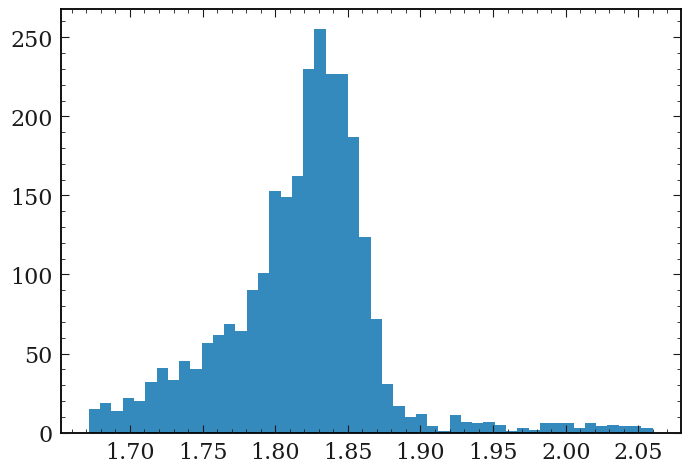

In [29]:
plt.hist(pd_rhog_ccbar_Vpi0.D0_M, bins=50);

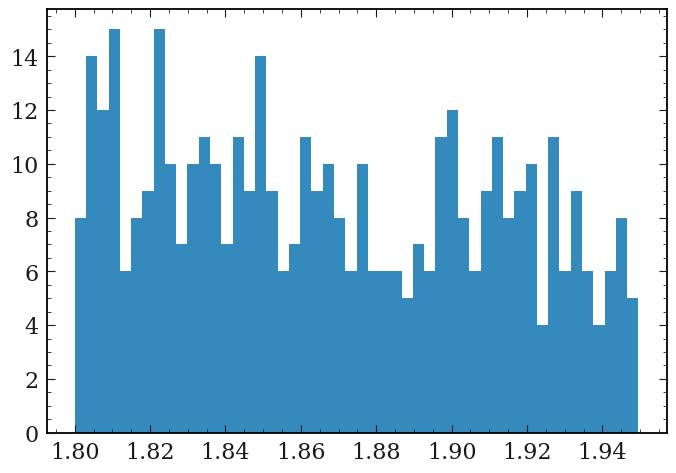

In [30]:
pipik_filter='abs(D0_cosHel_0)<0.8 && Pi0_Prob<0.85  && rho_rank_Dstp==1 && D0_M>1.80 && D0_M<1.95 && iCascDcyBrP_Dst_0==0'
pd_rhog_pipik = get_pd(file=Vg_ccbar, tree=tree,base_filter=pipik_filter,variables=variables)
plt.hist(pd_rhog_pipik.D0_M, bins=50);

In [31]:
len(pd_rhog_ccbar_signal)

138

D0_M


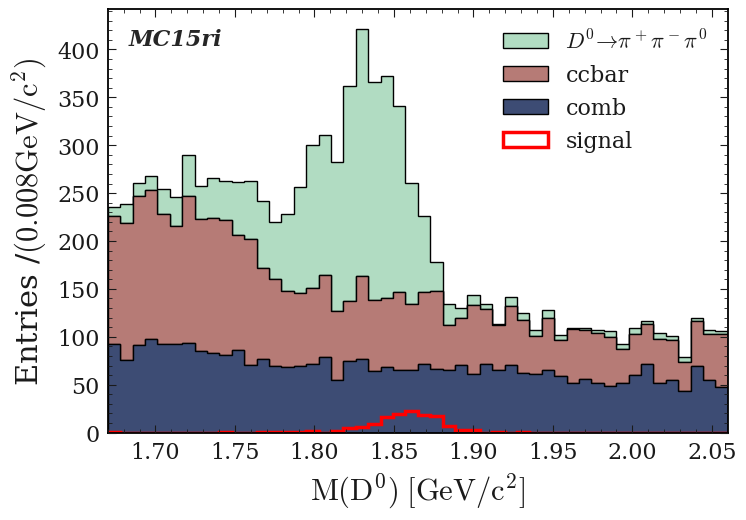

<Figure size 800x550 with 0 Axes>

In [32]:
labels = ['comb','ccbar' ,r'$D^0 \to \pi^+ \pi^- \pi^0$']


colors=b2helix(3)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_rhog_mixed[var] }
    charged_bkg = {var : pd_rhog_charged[var] }
    uubar_bkg = {var : pd_rhog_uubar[var] }
    ddbar_bkg = {var : pd_rhog_ddbar[var] }
    ssbar_bkg = {var : pd_rhog_ssbar[var] }
    taupair_bkg = {var : pd_rhog_taupair[var] }
    
    
    ccbar_bkg = {var : pd_rhog_ccbar_remain[var] }    
    Vpi0_bkg = {var : pd_rhog_ccbar_Vpi0[var] }
    
    #comb_bkg = pd.DataFrame
    
    comb_bkg_data = pd.concat([mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var]], ignore_index=True)
    comb_bkg = {var : comb_bkg_data}
    #print(mixed_bkg)
    #data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [comb_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

    
#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
    plt.hist(pd_rhog_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal', linewidth=2.5)
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

gamma_E


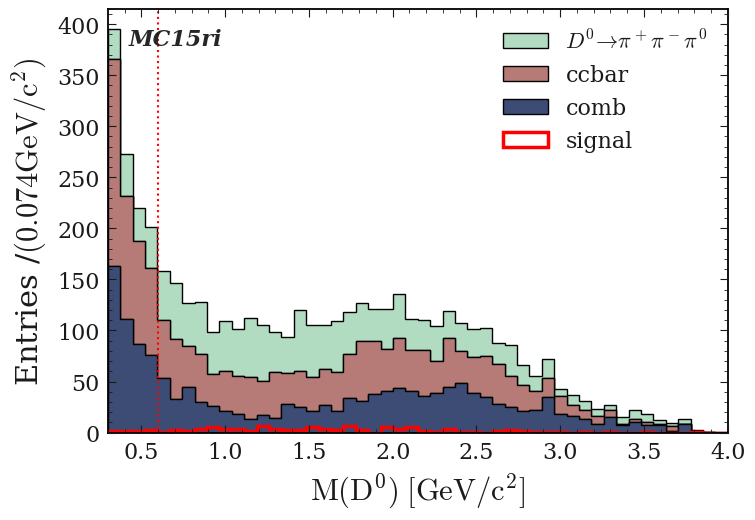

<Figure size 800x550 with 0 Axes>

In [96]:
labels = ['comb','ccbar' ,r'$D^0 \to \pi^+ \pi^- \pi^0$']


colors=b2helix(3)

data_list=dict()
signal_variables = ["gamma_E"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_rhog_mixed[var] }
    charged_bkg = {var : pd_rhog_charged[var] }
    uubar_bkg = {var : pd_rhog_uubar[var] }
    ddbar_bkg = {var : pd_rhog_ddbar[var] }
    ssbar_bkg = {var : pd_rhog_ssbar[var] }
    taupair_bkg = {var : pd_rhog_taupair[var] }
    
    
    ccbar_bkg = {var : pd_rhog_ccbar_remain[var] }    
    Vpi0_bkg = {var : pd_rhog_ccbar_Vpi0[var] }
    
    #comb_bkg = pd.DataFrame
    
    comb_bkg_data = pd.concat([mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var]], ignore_index=True)
    comb_bkg = {var : comb_bkg_data}
    #print(mixed_bkg)
    #data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [comb_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

    
#     for labeling in labels:
    xrange=(0.3,4)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
    plt.hist(pd_rhog_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal', linewidth=2.5)
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)
    plt.axvline(x=0.6,  color='red', linestyle='dotted')

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

D0_cosHel_0


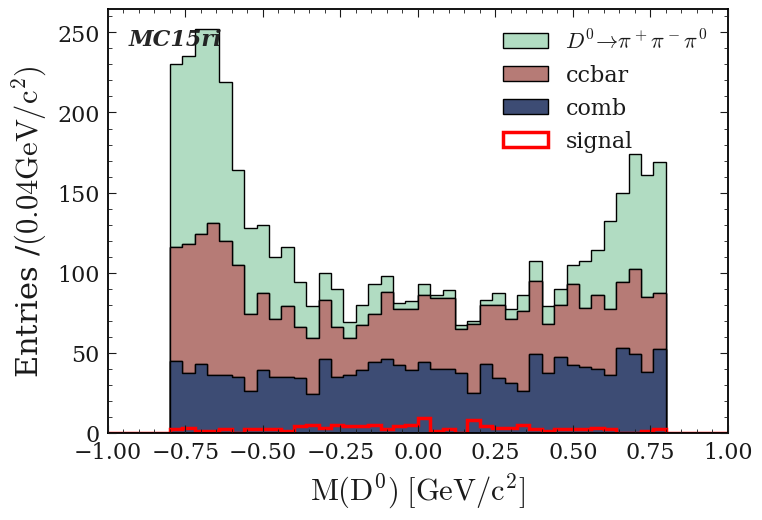

<Figure size 800x550 with 0 Axes>

In [93]:
labels = ['comb','ccbar' ,r'$D^0 \to \pi^+ \pi^- \pi^0$']


colors=b2helix(3)

data_list=dict()
signal_variables = ["D0_cosHel_0"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_rhog_mixed[var] }
    charged_bkg = {var : pd_rhog_charged[var] }
    uubar_bkg = {var : pd_rhog_uubar[var] }
    ddbar_bkg = {var : pd_rhog_ddbar[var] }
    ssbar_bkg = {var : pd_rhog_ssbar[var] }
    taupair_bkg = {var : pd_rhog_taupair[var] }
    
    
    ccbar_bkg = {var : pd_rhog_ccbar_remain[var] }    
    Vpi0_bkg = {var : pd_rhog_ccbar_Vpi0[var] }
    
    #comb_bkg = pd.DataFrame
    
    comb_bkg_data = pd.concat([mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var]], ignore_index=True)
    comb_bkg = {var : comb_bkg_data}
    #print(mixed_bkg)
    #data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [comb_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

    
#     for labeling in labels:
    xrange=(-1,1)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
    plt.hist(pd_rhog_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal', linewidth=2.5)
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

D0_M


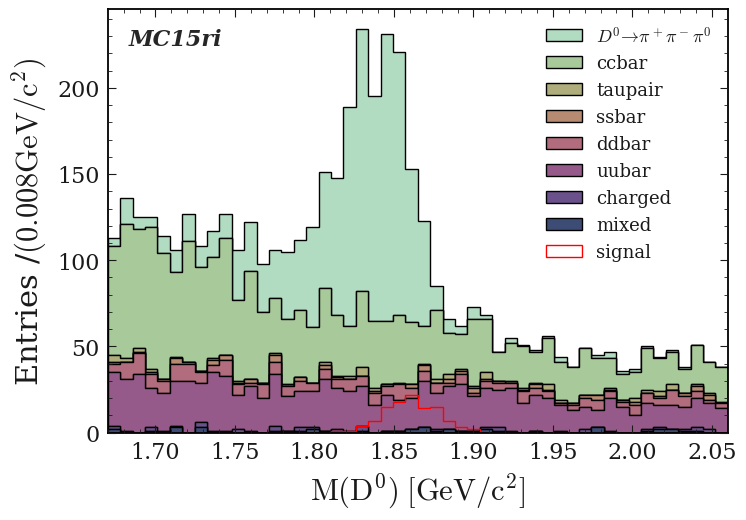

<Figure size 800x550 with 0 Axes>

In [44]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ,r'$D^0 \to \pi^+ \pi^- \pi^0$']


colors=b2helix(8)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_rhog_mixed[var] }
    charged_bkg = {var : pd_rhog_charged[var] }
    ccbar_bkg = {var : pd_rhog_ccbar_remain[var] }
    uubar_bkg = {var : pd_rhog_uubar[var] }
    ddbar_bkg = {var : pd_rhog_ddbar[var] }
    ssbar_bkg = {var : pd_rhog_ssbar[var] }
    taupair_bkg = {var : pd_rhog_taupair[var] }
    Vpi0_bkg = {var : pd_rhog_ccbar_Vpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    plt.hist(pd_rhog_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

In [40]:
len(pd_rhog_ccbar_signal[var])

121

gamma_E


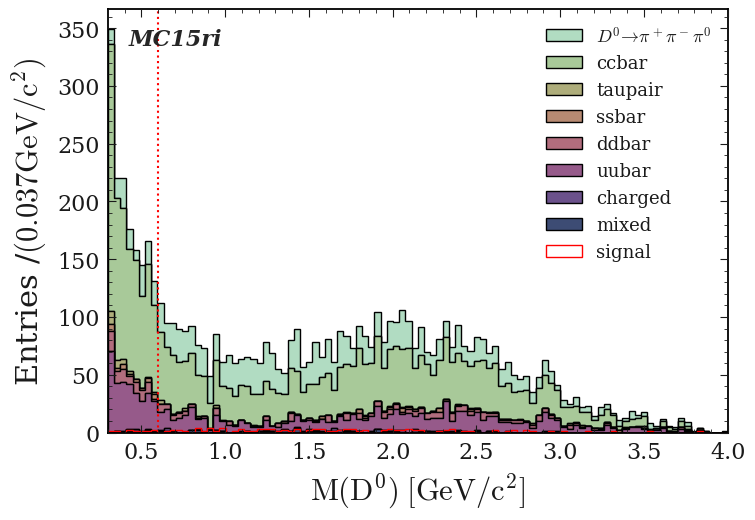

<Figure size 800x550 with 0 Axes>

In [37]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ,r'$D^0 \to \pi^+ \pi^- \pi^0$']


colors=b2helix(8)

data_list=dict()
signal_variables = ["gamma_E"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_rhog_mixed[var] }
    charged_bkg = {var : pd_rhog_charged[var] }
    ccbar_bkg = {var : pd_rhog_ccbar_remain[var] }
    uubar_bkg = {var : pd_rhog_uubar[var] }
    ddbar_bkg = {var : pd_rhog_ddbar[var] }
    ssbar_bkg = {var : pd_rhog_ssbar[var] }
    taupair_bkg = {var : pd_rhog_taupair[var] }
    Vpi0_bkg = {var : pd_rhog_ccbar_Vpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

#     for labeling in labels:
    xrange=(0.3,4)
    xbins = np.linspace(*xrange,101)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    plt.hist(pd_rhog_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    plt.axvline(x=0.6,  color='red', linestyle='dotted')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=100, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

Pi0_Prob


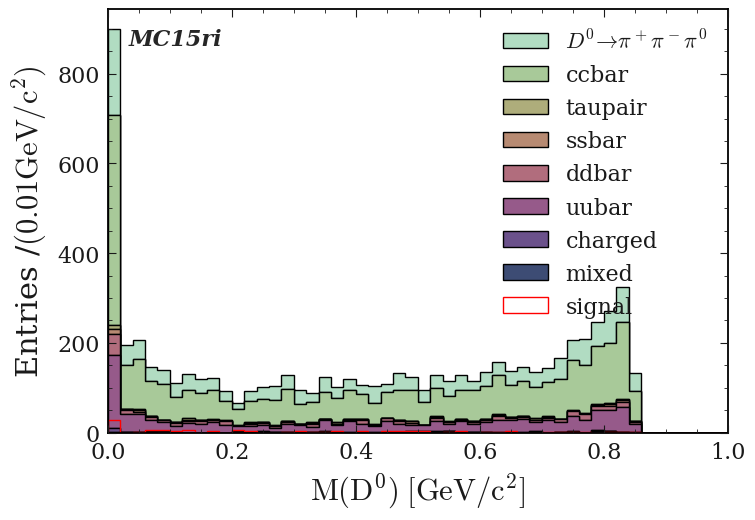

<Figure size 800x550 with 0 Axes>

In [38]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ,r'$D^0 \to \pi^+ \pi^- \pi^0$']


colors=b2helix(8)

data_list=dict()
signal_variables = ["Pi0_Prob"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_rhog_mixed[var] }
    charged_bkg = {var : pd_rhog_charged[var] }
    ccbar_bkg = {var : pd_rhog_ccbar_remain[var] }
    uubar_bkg = {var : pd_rhog_uubar[var] }
    ddbar_bkg = {var : pd_rhog_ddbar[var] }
    ssbar_bkg = {var : pd_rhog_ssbar[var] }
    taupair_bkg = {var : pd_rhog_taupair[var] }
    Vpi0_bkg = {var : pd_rhog_ccbar_Vpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

#     for labeling in labels:
    xrange=(0,1)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    plt.hist(pd_rhog_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=100, range=xrange)

    ax.set_xlim(xrange[0],xrange[1])
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

###### 

In [21]:
len

<function len(obj, /)>

# omega gamma

In [97]:
# base_file_loc = '/media/jykim/T7/storage/01_recon/skim_1ab_inv_signal_extraction/'

# Vg_ccbar = base_file_loc + 'topo/skim_1abinv_rho_D0_M/topoana.root'

base_file_loc = '/media/jykim/T7/storage/01_recon/new_sigext_cuts_skim_1ab_inv_bkg_sig/'
base_file_loc = '/media/jykim/T7/storage/01_recon/trainv2new_sig_extract/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2new_sig_extract_400fb/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext_sig_bkg/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/v2_sigext_omega_const_sigbkg_1ab/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/train_v6_beambkg_sig_ext/'

Vg_ccbar = base_file_loc + 'topo/resultfile/result_omega/standard.root'

# Vg_ccbar = base_file_loc + 'topo/topo_omega_D0_M/topoana.root'
# phigamma_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
Vg_uubar = base_file_loc + 'uubar/recon_udst_*.root'
Vg_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
Vg_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
Vg_charged = base_file_loc + 'charged/recon_udst_*.root'
Vg_mixed = base_file_loc + 'mixed/recon_udst_*.root'
Vg_taupair = base_file_loc + 'taupair/recon_udst_*.root'

In [98]:
base_filter='abs(D0_COS_DALITZ)<0.8 && Pi0_Prob<0.85  && omega_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 '
#base_filter='Pi0_Prob<0.90  && D0_M>1.67 && D0_M<2.06 '

# base_filter='Pi0_Prob<0.95 && phi_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06'

#ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0 !=1 && iCascDcyBrP_Dst_0 !=2)'
# ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '

#gamma_E>0.6 &&
#ccbar_filter='Pi0_Prob<0.9 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_D0_0 !=0 ) && (phi_rank_Dstp ==1)'

variables=['D0_M','D0_cosHel_0','Dstarp_CMS_p','Pi0_Prob','gamma_E','gamma_CMS_p']
tree='omega'

In [99]:
Vpi0_filter=' abs(D0_COS_DALITZ)<0.8 &&  Pi0_Prob<0.85  && omega_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0==13 ) && iCascDcyBrP_Dst_0!=0'
except_Vpi0_filter='abs(D0_COS_DALITZ)<0.8 && Pi0_Prob<0.85  && omega_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0!=13 ) && iCascDcyBrP_Dst_0!=0'
signal_filter='abs(D0_COS_DALITZ)<0.8 && Pi0_Prob<0.85  && omega_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && iCascDcyBrP_Dst_0==0'

In [100]:
pd_omegag_ccbar_Vpi0 = get_pd(file=Vg_ccbar, tree=tree,base_filter=Vpi0_filter,variables=variables)
pd_omegag_ccbar_remain = get_pd(file=Vg_ccbar, tree=tree,base_filter=except_Vpi0_filter,variables=variables)
pd_omegag_ccbar_signal = get_pd(file=Vg_ccbar, tree=tree,base_filter=signal_filter,variables=variables)

pd_omegag_uubar = get_pd(file=Vg_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_omegag_ddbar = get_pd(file=Vg_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_omegag_ssbar = get_pd(file=Vg_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_omegag_charged = get_pd(file=Vg_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_omegag_mixed = get_pd(file=Vg_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_omegag_taupair = get_pd(file=Vg_taupair, tree=tree,base_filter=base_filter,variables=variables)

D0_M


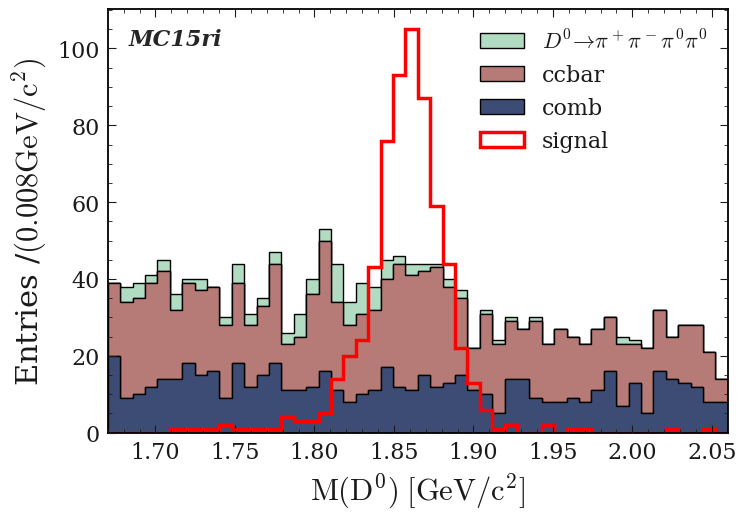

<Figure size 800x550 with 0 Axes>

In [101]:
labels = ['comb','ccbar' ,r'$D^0 \to \pi^+ \pi^- \pi^0 \pi^0 $']


colors=b2helix(3)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_omegag_mixed[var] }
    charged_bkg = {var : pd_omegag_charged[var] }
    uubar_bkg = {var : pd_omegag_uubar[var] }
    ddbar_bkg = {var : pd_omegag_ddbar[var] }
    ssbar_bkg = {var : pd_omegag_ssbar[var] }
    taupair_bkg = {var : pd_omegag_taupair[var] }
    
    
    ccbar_bkg = {var : pd_omegag_ccbar_remain[var] }    
    Vpi0_bkg = {var : pd_omegag_ccbar_Vpi0[var] }
    
    #comb_bkg = pd.DataFrame
    
    comb_bkg_data = pd.concat([mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var]], ignore_index=True)
    comb_bkg = {var : comb_bkg_data}
    #print(mixed_bkg)
    #data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [comb_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

    
#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
    plt.hist(pd_omegag_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal', linewidth=2.5)
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

D0_M


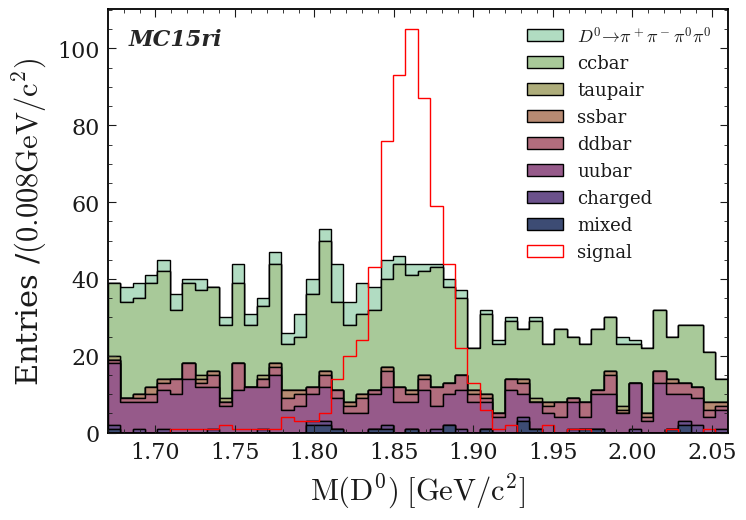

<Figure size 800x550 with 0 Axes>

In [102]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ,r'$D^0 \to \pi^+ \pi^- \pi^0 \pi^0$']


colors=b2helix(8)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_omegag_mixed[var] }
    charged_bkg = {var : pd_omegag_charged[var] }
    ccbar_bkg = {var : pd_omegag_ccbar_remain[var] }
    uubar_bkg = {var : pd_omegag_uubar[var] }
    ddbar_bkg = {var : pd_omegag_ddbar[var] }
    ssbar_bkg = {var : pd_omegag_ssbar[var] }
    taupair_bkg = {var : pd_omegag_taupair[var] }
    Vpi0_bkg = {var : pd_omegag_ccbar_Vpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    plt.hist(pd_omegag_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

D0_M


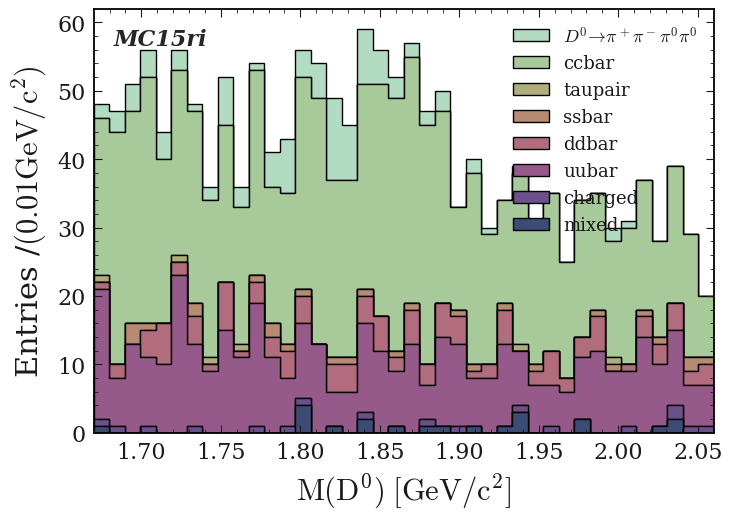

<Figure size 800x550 with 0 Axes>

In [103]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ,r'$D^0 \to \pi^+ \pi^- \pi^0 \pi^0$']


colors=b2helix(8)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_omegag_mixed[var] }
    charged_bkg = {var : pd_omegag_charged[var] }
    ccbar_bkg = {var : pd_omegag_ccbar_remain[var] }
    uubar_bkg = {var : pd_omegag_uubar[var] }
    ddbar_bkg = {var : pd_omegag_ddbar[var] }
    ssbar_bkg = {var : pd_omegag_ssbar[var] }
    taupair_bkg = {var : pd_omegag_taupair[var] }
    Vpi0_bkg = {var : pd_omegag_ccbar_Vpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,41)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    #plt.hist(pd_omegag_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=40, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

In [104]:
len(pd_omegag_ccbar_signal[var])

640

gamma_E


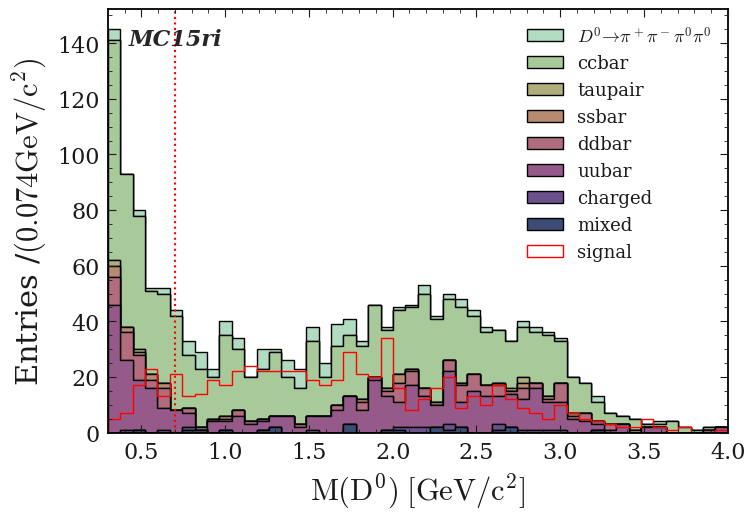

<Figure size 800x550 with 0 Axes>

In [106]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ,r'$D^0 \to \pi^+ \pi^- \pi^0 \pi^0$']


colors=b2helix(8)

data_list=dict()
signal_variables = ["gamma_E"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_omegag_mixed[var] }
    charged_bkg = {var : pd_omegag_charged[var] }
    ccbar_bkg = {var : pd_omegag_ccbar_remain[var] }
    uubar_bkg = {var : pd_omegag_uubar[var] }
    ddbar_bkg = {var : pd_omegag_ddbar[var] }
    ssbar_bkg = {var : pd_omegag_ssbar[var] }
    taupair_bkg = {var : pd_omegag_taupair[var] }
    Vpi0_bkg = {var : pd_omegag_ccbar_Vpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

#     for labeling in labels:
    xrange=(0.3,4)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    plt.hist(pd_omegag_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    plt.axvline(x=0.7,  color='red', linestyle='dotted')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

In [110]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ,r'$D^0 \to \pi^+ \pi^- \pi^0$']


colors=b2helix(8)

data_list=dict()
signal_variables = ["Pi0_Prob"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_omegag_mixed[var] }
    charged_bkg = {var : pd_omegag_charged[var] }
    ccbar_bkg = {var : pd_omegag_ccbar_remain[var] }
    uubar_bkg = {var : pd_omegag_uubar[var] }
    ddbar_bkg = {var : pd_omegag_ddbar[var] }
    ssbar_bkg = {var : pd_omegag_ssbar[var] }
    taupair_bkg = {var : pd_omegag_taupair[var] }
    Vpi0_bkg = {var : pd_omegag_ccbar_Vpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

#     for labeling in labels:
    xrange=(0,1)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    plt.hist(pd_omegag_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=100, range=xrange)

    ax.set_xlim(xrange[0],xrange[1])
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

Pi0_Prob


NameError: name 'pd_omegag_mixed' is not defined

###### 